# FlameStream workers scalability comparision

In [104]:
prep <- function(path) {
    return (tail(scan(path, sep = ","), -200) / 1e6)
}

In [114]:
fl.bbd9c73 <- prep("fl-bbd9c73.data")
fl.4fab6073 <- prep("fl-4fab6073.data")
fs.99afd4c <- prep("fs-99afd4c.data")
fs.100ms <- prep("fs-tmp.data")
sizes <- tail(scan("1k.data", sep = ","), -200)

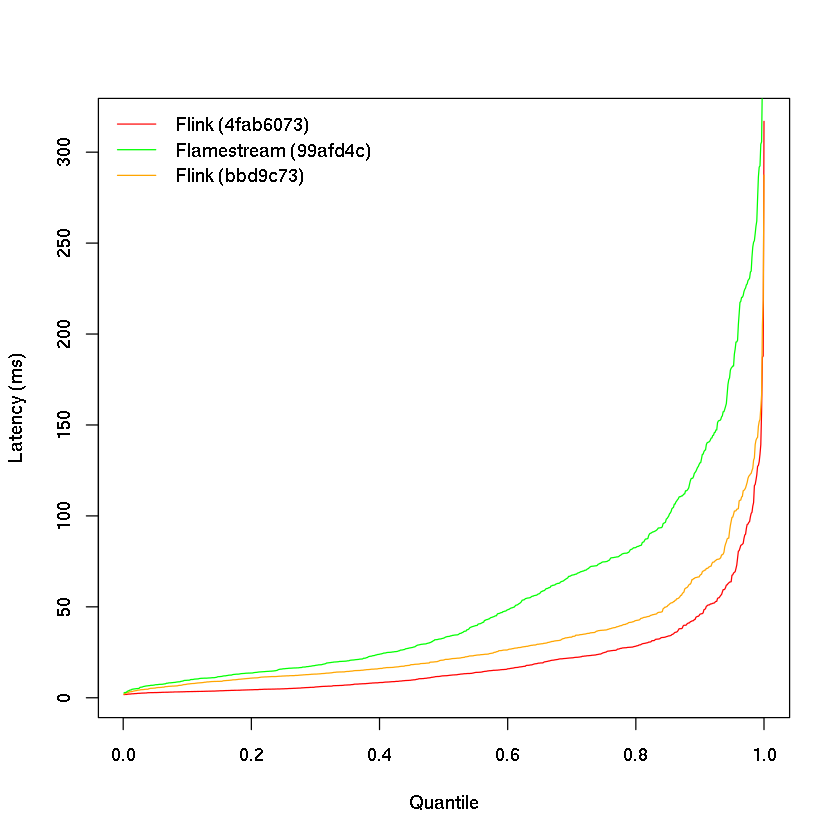

In [116]:
quntiles.1000 <- seq(1, length(fl.4fab6073)) / length(fl.4fab6073)
quntiles.10000 <- seq(1, length(fs.100ms)) / length(fs.100ms)
plot(quntiles.1000, sort(fl.4fab6073), type = "l", col = "red",  xlab = "Quantile", ylab = "Latency (ms)")
lines(quntiles.1000, sort(fl.bbd9c73), col = "orange")
lines(quntiles.1000, sort(fs.99afd4c), col = "green")
legend(
    "topleft", 
    legend = c("Flink (4fab6073)", "Flamestream (99afd4c)", "Flink (bbd9c73)"), 
    col = c("red", "green", "orange"),
    lty = c(1,  1, 1),
    bty = "n",
    text.col = "black"
)

In [22]:
bars <- function(a, b, col.names = c("FlameStream", "Flink")) {
    m <- matrix(c(quantile(a, p = 0.5),
        quantile(a, p = 0.95) - quantile(a, p = 0.5),
        quantile(a, p = 0.99) - quantile(a, p = 0.95),
        quantile(b, p = 0.5),
        quantile(b, p = 0.95) - quantile(b, p = 0.5),
        quantile(b, p = 0.99) - quantile(b, p = 0.95)), nrow=3)
    colnames(m) <- col.names
    rownames(m) <- c("50%", "95%", "99%")
    barplot(m, horiz = T, col = c("grey20", "grey50", "grey80"), xlab = "Latency (ms)")
    legend("bottomright",
           title = "Quantiles",
           legend = c("50%", "95%", "99%"), 
           fill = c("grey20", "grey50", "grey80"))
}

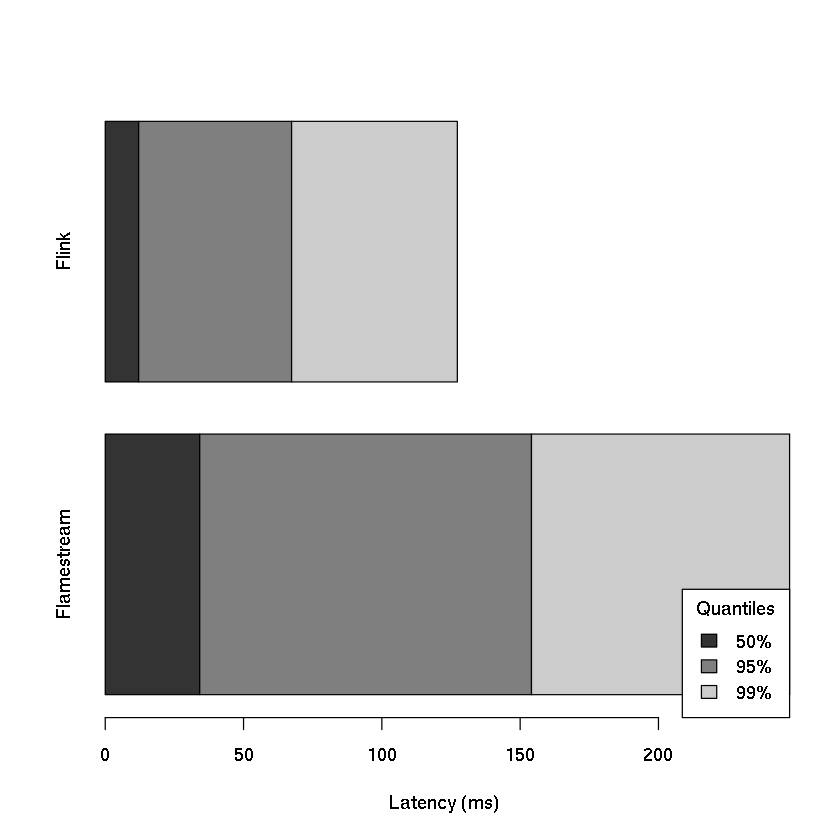

In [29]:
bars(fs.4fab6073, fl.4fab6073, c("Flamestream", "Flink"))

In [25]:
t.test(fs.af21229, fl.4fab6073, paired = T)


	Paired t-test

data:  fs.af21229 and fl.4fab6073
t = 28.153, df = 799, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 25.33195 29.12922
sample estimates:
mean of the differences 
               27.23058 
